# Image data generator

From: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class. This class allows you to:

- configure random transformations and normalization operations to be done on your image data during training
- instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs, `fit_generator`, `evaluate_generator` and `predict_generator`.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
from PIL import Image
import pylab as pl

%matplotlib inline

Using Theano backend.


Documentenation on `ImageDataGenerator`: https://keras.io/preprocessing/image/

In [3]:
datagen = ImageDataGenerator(
        # rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [4]:
img = load_img('../data/dogs_vs_cats/train/cats/cat.12.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='../data/dogs_vs_cats/preview',
                          save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely

In [5]:
image_names = glob('../data/dogs_vs_cats/preview/*')

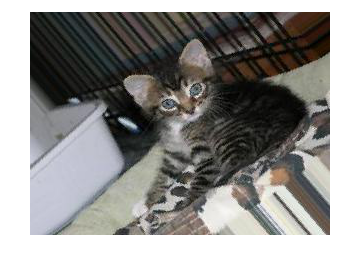

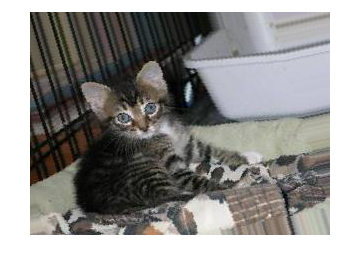

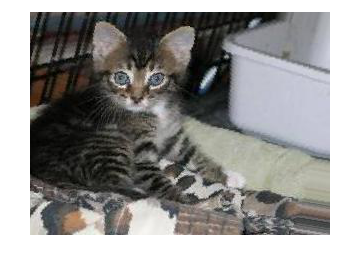

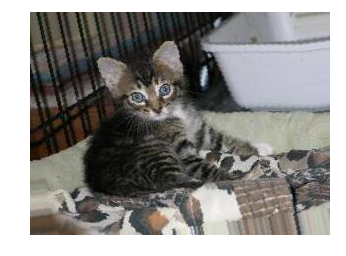

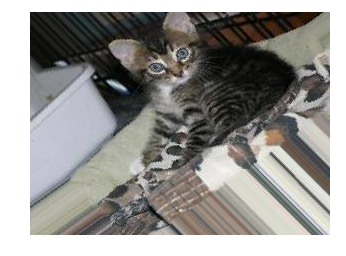

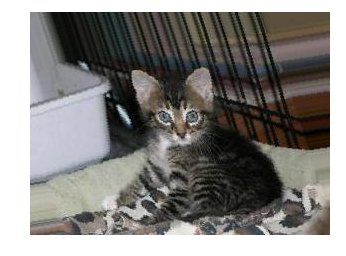

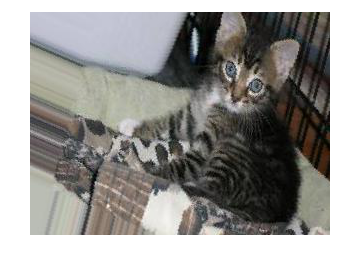

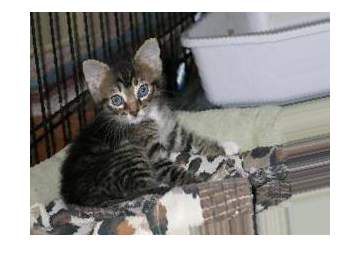

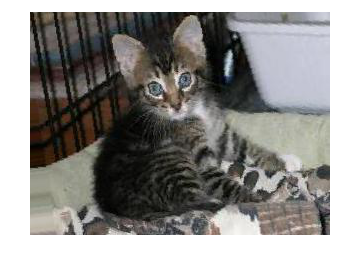

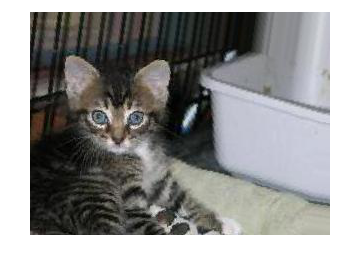

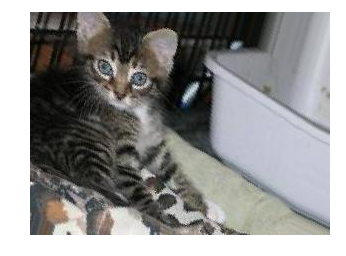

In [6]:
for fname in image_names:
    img = load_img(fname)
    x = np.array(img)
    pl.figure()
    pl.imshow(x)
    pl.axis('off')